### Bibliotecas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

### Objetivo

Este estudo tem como objetivo analisar as taxas dos títulos prefixados com duração aproximada de 2 anos (entre 700 e 760 dias), que apresentaram um aumento significativo nas últimas semanas. Esse comportamento despertou o interesse em investigar o quão distantes as taxas atuais estão em relação às médias históricas, com o intuito de identificar uma possível oportunidade de compra desses papéis.

### Importando e Tratando a Base de Dados

Os dados utilizados neste estudo foram extraídos do site do Tesouro Transparente em 03 de dezembro de 2024. Abaixo, segue o link para a fonte de dados:

Taxas Tesouro: https://tesourotransparente.gov.br/ckan/dataset/taxas-dos-titulos-ofertados-pelo-tesouro-direto/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1

In [4]:
# Importando a base de dados
td_data = pd.read_csv(r'C:\Users\emanu\Downloads\PrecoTaxaTesouroDireto_20250401.csv', 
                      sep=';', 
                      parse_dates=['Data Vencimento', 'Data Base'], 
                      dayfirst=True)

td_data

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro IGPM+ com Juros Semestrais,2017-07-01,2009-09-11,"6,08","6,14","2212,87","2205,05","2204,37"
1,Tesouro IGPM+ com Juros Semestrais,2011-03-01,2009-09-11,"4,81","4,83","2235,89","2235,29","2234,71"
2,Tesouro Prefixado com Juros Semestrais,2011-01-01,2009-09-11,"9,77","9,81","1022,11","1021,66","1021,28"
3,Tesouro Prefixado com Juros Semestrais,2010-07-01,2009-09-11,"8,97","9,01","1027,58","1027,29","1026,94"
4,Tesouro Prefixado com Juros Semestrais,2010-01-01,2009-09-11,"8,71","8,74","1022,72","1022,63","1022,29"
...,...,...,...,...,...,...,...,...
151474,Tesouro Prefixado com Juros Semestrais,2010-07-01,2010-06-14,"10,17","10,20","1043,98","1043,96","1043,56"
151475,Tesouro Prefixado com Juros Semestrais,2021-01-01,2010-06-14,"12,63","12,69","899,86","896,91","896,49"
151476,Tesouro Prefixado com Juros Semestrais,2017-01-01,2010-06-14,"12,53","12,59","938,11","935,78","935,34"
151477,Tesouro Prefixado com Juros Semestrais,2011-01-01,2010-06-14,"11,16","11,20","1037,50","1037,30","1036,86"


In [5]:
# Precisamos tratar as colunas de taxas e PU que estão como objetos e precisam estar no formato float
td_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151479 entries, 0 to 151478
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Tipo Titulo        151479 non-null  object        
 1   Data Vencimento    151479 non-null  datetime64[ns]
 2   Data Base          151479 non-null  datetime64[ns]
 3   Taxa Compra Manha  151479 non-null  object        
 4   Taxa Venda Manha   151479 non-null  object        
 5   PU Compra Manha    151479 non-null  object        
 6   PU Venda Manha     151479 non-null  object        
 7   PU Base Manha      151479 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 9.2+ MB


In [6]:
# Filtrando as colunas de interesse
taxas_pu = td_data.columns[3:5]

taxas_pu

Index(['Taxa Compra Manha', 'Taxa Venda Manha'], dtype='object')

In [7]:
# Para poder transformar em float é preciso substituir "," por "." e isto é feito com o str.replace
td_data[taxas_pu] = td_data[taxas_pu].apply(lambda col: col.str.replace(",", ".").astype(float))

td_data[taxas_pu]

,Taxa Compra Manha,Taxa Venda Manha
0,6.08,6.14
1,4.81,4.83
2,9.77,9.81
3,8.97,9.01
4,8.71,8.74
...,...,...
151474,10.17,10.20
151475,12.63,12.69
151476,12.53,12.59
151477,11.16,11.20


In [8]:
# Validação do tipo correto
td_data[taxas_pu].dtypes

Taxa Compra Manha    float64
Taxa Venda Manha     float64
dtype: object

In [9]:
# Todos os tipos de títulos disponíveis
td_data['Tipo Titulo'].unique()

array(['Tesouro IGPM+ com Juros Semestrais',
       'Tesouro Prefixado com Juros Semestrais', 'Tesouro Selic',
       'Tesouro Prefixado', 'Tesouro IPCA+ com Juros Semestrais',
       'Tesouro IPCA+', 'Tesouro Renda+ Aposentadoria Extra',
       'Tesouro Educa+'], dtype=object)

In [10]:
# Criamos uma coluna com o duration dos títulos
td_data['Duration'] = (td_data['Data Vencimento'] - td_data['Data Base']).dt.days

td_data['Duration']

0         2850
1          536
2          477
3          293
4          112
          ... 
151474      17
151475    3854
151476    2393
151477     201
151478     566
Name: Duration, Length: 151479, dtype: int64

In [11]:
# Filtrando o títulos prefixados zero-cupom e as colunas de interesse
ltn_data = td_data[td_data['Tipo Titulo'] == 'Tesouro Prefixado']
ltn_data = ltn_data[['Data Vencimento', 'Data Base', 'Taxa Compra Manha','Taxa Venda Manha', 'Duration']]

ltn_data

,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,Duration
14,2011-01-01,2009-09-10,9.82,9.86,478
15,2012-01-01,2009-09-10,11.13,11.19,843
16,2009-10-01,2009-09-10,8.70,8.73,21
17,2010-01-01,2009-09-10,8.71,8.74,113
18,2010-07-01,2009-09-10,8.98,9.02,294
...,...,...,...,...,...
151423,2011-01-01,2010-06-15,11.18,11.22,200
151453,2013-01-01,2010-06-14,12.43,12.49,932
151454,2012-01-01,2010-06-14,12.20,12.25,566
151455,2011-01-01,2010-06-14,11.15,11.19,201


In [12]:
# Filtrando o duration entre 700 e 760 dias
ltn_data_filt = ltn_data[(ltn_data['Duration'] <= 760) & (ltn_data['Duration'] >= 700)].reset_index().drop(columns='index')
ltn_data_filt = ltn_data_filt.sort_values('Data Base', ascending=True)
ltn_data_filt['Ano'] = ltn_data_filt['Data Base'].dt.year

ltn_data_filt

,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,Duration,Ano
167,2007-07-01,2005-06-07,18.01,18.07,754,2005
166,2007-07-01,2005-06-08,18.12,18.18,753,2005
165,2007-07-01,2005-06-09,18.07,18.13,752,2005
164,2007-07-01,2005-06-10,18.29,18.35,751,2005
163,2007-07-01,2005-06-13,18.11,18.17,748,2005
...,...,...,...,...,...,...
972,2027-01-01,2024-12-26,15.65,15.77,736,2024
969,2027-01-01,2024-12-27,15.52,15.64,735,2024
970,2027-01-01,2024-12-30,15.85,15.97,732,2024
968,2027-01-01,2025-01-02,15.92,16.04,729,2025


### Estatísticas Descritivas

In [14]:
ltn_data_filt.describe()

,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,Duration,Ano
count,1016,1016,1016.000000,1016.000000,1016.000000,1016.000000
mean,2015-07-29 01:57:38.267716608,2013-07-29 01:16:32.125984,11.782382,11.859793,730.028543,2013.072835
min,2007-07-01 00:00:00,2005-06-07 00:00:00,4.310000,4.430000,700.000000,2005.000000
25%,2010-01-01 00:00:00,2007-12-09 06:00:00,10.340000,10.437500,714.750000,2007.000000
50%,2015-01-01 00:00:00,2012-12-06 12:00:00,12.220000,12.270000,729.000000,2012.000000
75%,2021-01-01 00:00:00,2018-12-18 06:00:00,13.512500,13.622500,746.000000,2018.000000
max,2027-01-01 00:00:00,2025-01-03 00:00:00,18.290000,18.350000,760.000000,2025.000000
std,NaN,NaN,3.214680,3.198898,17.820677,6.051878


In [15]:
# Abaixo podemos vizualizar as taxas médias, máximas e seu desvio-padrão agrupadas por ano
taxa_ano = round(ltn_data_filt.groupby('Ano')['Taxa Compra Manha'].agg(['mean','max','min','std']),2)

taxa_ano

,mean,max,min,std
Ano,,,,
2005,17.24,18.29,16.02,0.70
2006,14.93,16.40,12.44,1.28
2007,11.59,12.91,10.41,0.75
2008,14.05,15.71,12.29,1.08
2009,11.80,12.29,11.22,0.24
2010,12.12,12.52,11.72,0.33
2011,11.60,12.97,10.17,1.16
2012,9.28,10.75,7.41,1.44
2013,9.84,12.16,7.73,2.02


In [16]:
# Taxa mais atualizada
taxa_atual = ltn_data_filt['Taxa Compra Manha'].iloc[-1]
data_atual = ltn_data_filt['Data Base'].iloc[-1]

print(f'A taxa do dia {data_atual.strftime('%d-%m-%Y')} é de {taxa_atual} %')

A taxa do dia 03-01-2025 é de 15.66 %


In [17]:
percentis = np.arange(0,1.1, 0.1)

taxas_percentis = []
nome_percentis = []

for i in percentis:
    taxas_percentis.append(ltn_data_filt['Taxa Compra Manha'].quantile(i))
    nome_percentis.append(f'Percentil: {round(i,1)}')

taxas_percentil = pd.DataFrame({'Taxa_Corte': taxas_percentis}, index=nome_percentis)
taxas_percentil

,Taxa_Corte
Percentil: 0.0,4.310
Percentil: 0.1,7.400
Percentil: 0.2,9.650
Percentil: 0.3,10.640
Percentil: 0.4,11.660
Percentil: 0.5,12.220
Percentil: 0.6,12.580
Percentil: 0.7,12.965
Percentil: 0.8,14.900
Percentil: 0.9,16.020


### Gráficos

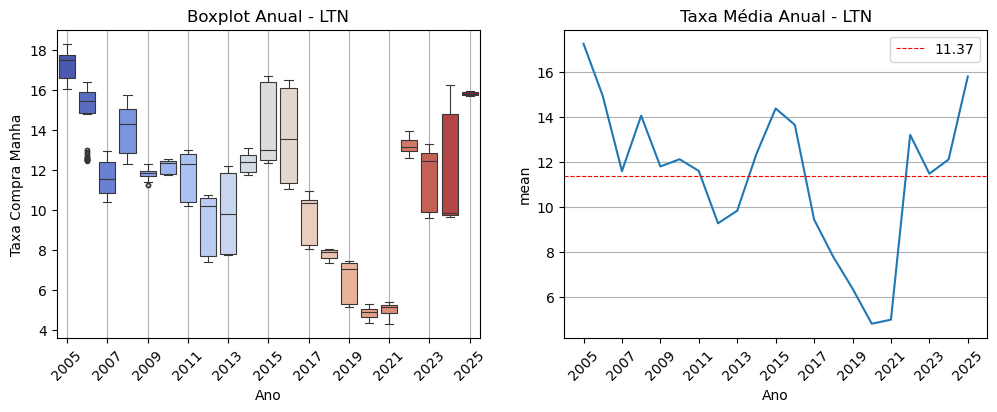

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Boxplot Anual - LTN')
sns.boxplot(data=ltn_data_filt, y='Taxa Compra Manha', x='Ano', hue='Ano', palette='coolwarm', linewidth=0.8, flierprops={"markersize":3})
plt.legend([], [], frameon=False)
plt.xticks(ticks=range(0, len(ltn_data_filt['Ano'].unique()), 2), rotation=45)
plt.grid(axis='x')

plt.subplot(1,2,2)
plt.title('Taxa Média Anual - LTN')
sns.lineplot(data=taxa_ano, y='mean', x='Ano')
plt.xticks(ticks=taxa_ano.index[::2], rotation=45)
plt.axhline(taxa_ano['mean'].mean(), color='red', linestyle='--', linewidth=0.8, label=round(taxa_ano['mean'].mean(),2))
plt.legend()
plt.grid(axis='y')

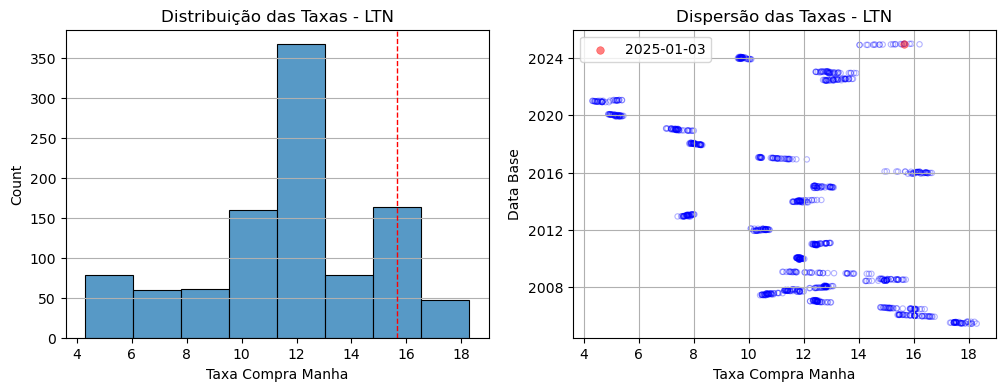

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribuição das Taxas - LTN')
sns.histplot(ltn_data_filt['Taxa Compra Manha'], linewidth=0.8, bins=8)
plt.axvline(taxa_atual, color='red', linestyle='--', linewidth=1)
plt.grid(axis='y')

plt.subplot(1,2,2)
plt.title('Dispersão das Taxas - LTN')
sns.scatterplot(data = ltn_data_filt, x='Taxa Compra Manha', y='Data Base', s = 15, edgecolor='blue', linewidth=0.8, facecolor='none', alpha=0.3)
sns.scatterplot(x=[taxa_atual], y=[data_atual], s = 30, c = 'red', edgecolor='red', label = data_atual.strftime('%Y-%m-%d'), alpha=0.5)
plt.xlabel('Taxa Compra Manha') 
plt.ylabel('Data Base')
plt.legend()
plt.grid()

### Resultados

No dia 3 de dezembro de 2025, a taxa das LTN zero-cupom alcançou o patamar de 15,66%, posicionando-se acima de 80% das observações históricas (percentil 80 = 14,90%). Observamos que taxas neste nível foi registrado apenas em períodos como 2006, 2008 e 2025 que foram anos atípicos marcados por crises econômicas como a crise do subprime e a crise do Dilma II. 

Outro aspecto relevante é que o ano de 2024 se destaca como um período-chave para compreender a abertura da curva de juros que houve nos últimos meses, evidenciada pela diferença expressiva entre a taxa mínima e máxima do período, superior a 6 pontos percentuais (p.p.). Conforme foi reletado pela mídia especializada e também por economistas, isto se deve a deterioração das expectativas de inflação e a falta de credibilidade quanto ao compromisso fiscal de défict zero. 

A análise do histograma mostra que a taxa atual encontra-se na cauda direita da distribuição, muito próxima das máximas históricas. Quando observamos o gráfico de distribuição das taxas ao longo do tempo, podemos vizualizar que a taxa atual é elevada em relação aos anos anteriores entretanto não supera as taxas registradas nas últimas semanas. 